In [1]:
import pandas as pd
import numpy as np
import gc

from scipy import stats
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
def csv_read(p_path,header_is=0):
    pd_data=pd.read_csv(p_path, sep=',',header=header_is)
    column_names=pd_data.columns.values.tolist()
    print(column_names)
    return pd_data,np.array(pd_data),column_names

#-------------------------------------------------------------------------------------
def write_to_csv(p_data,p_path):
    dataframe = pd.DataFrame(p_data)
    dataframe.to_csv(p_path, mode='a',header=False,index=False,sep=',')
    del dataframe
    gc.collect()
    
#-------------------------------------------------------------------------------------
def bar_figure(group1,group2,y_label):
    figure,axes=plt.subplots()
    
    axes.boxplot([group1,group2],patch_artist=True)
    plt.xticks(range(1,3),['Group 1','Group 2'])
    #plt.yticks(fontsize = 20)
    
    min_end=min(np.min(group1),np.min(group2))
    max_end=max(np.max(group1),np.max(group2))
    end=(max_end-min_end)/10
    plt.ylim(min_end-end,max_end+end)
    plt.ylabel(y_label)
    plt.show()

#-------------------------------------------------------------------------------------
def statistic_analysis(group1, group2):
    var_same=stats.levene(group1, group2)
    
    print("\n")
    print("-"*80)
    
    print("var_same",var_same)

    if var_same[1]>0.05:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=True)
        print("Test: f_t, p_value_t", format(f_t,'.3E'), format(p_value_t,'.3E'))
    else:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=False)
        print("Test: f_t, p_value_t",format(f_t,'.3E'), format(p_value_t,'.3E'))
    
    f, p_value = stats.f_oneway(group1, group2)
    print("ANOVA: f, p_value:",format(f,'.3E'), format(p_value_t,'.3E'))
    print("-"*80)
    print("\n")
    
#-------------------------------------------------------------------------------------
def draw_bar(p_data,p_title):
    fz=20
    params = {'figure.figsize': '8, 6'}
    plt.rcParams.update(params)
    width=0.3

    colors=['#d5695d','#5d8ca8','green','purple']

    different_elements_keys=np.unique(p_data)
    keys_values = Counter(p_data)
    total_counts=np.sum([*keys_values.values()])
    total_index=np.arange(len(different_elements_keys))
    for i in total_index:
        different_elements_keys_i=different_elements_keys[i]
        rects_1=plt.bar(i,keys_values[different_elements_keys_i]/total_counts,width,color=colors[i])

    plt.xticks(total_index,different_elements_keys,fontsize=fz)
    plt.yticks(np.arange(0,1,0.2),fontsize=fz)
    plt.ylim(0,1)
    plt.title(p_title)
    plt.show()

In [3]:
data,data_arr,column_names=csv_read('./data/survival_data_filtered_3.csv')
column_names_arr=np.array(column_names)

FS_data,FS_data_arr,_=csv_read('./feature_selection.csv',header_is=None)

['NACCREAS', 'NACCREFR', 'BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'HISPOR', 'RACE', 'RACESEC', 'RACETER', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'NACCFADM', 'NACCFFTD', 'MEMORY', 'ORIENT', 'JUDGMENT', 'COMMUN', 'HOMEHOBB', 'PERSCARE', 'CDRSUM', 'DECSUB', 'DECIN', 'COGMEM', 'COGJUDG', 'COGLANG', 'COGVIS', 'COGATTN', 'COGOTHR', 'NACCCOGF', 'COGMODE', 'DECAGE', 'BEAPATHY', 'BEDEP', 'BEVHALL', 'BEAHALL', 'BEDEL', 'BEDISIN', 'BEIRRIT', 'BEAGIT', 'BEPERCH', 'BEOTHR', 'NACCBEHF', 'BEMODE', 'MOGAIT', 'MOFALLS', 'MOTREM', 'MOSLOW', 'NACCMOTF', 'MOMODE', 'COURSE', 'FRSTCHG', 'NORMCOG', 'DEMENTED', 'NACCPPA', 'NACCBVFT', 'NACCLBDS', 'NACCTMCI', 'NACCMCIL', 'NACCMCIA', 'NACCMCIE', 'NACCMCIV', 'NACCMCII', 'IMPNOMCI', 'NACCALZD', 'NACCALZP', 'NACCLBDE', 'NACCLBDP', 'PARK', 'PSP', 'PSPIF', 'CORT', 'CORTIF', 'DOWNS', 'DOWNSIF', 'HUNT', 'HUNTIF', 'PRION', 'PRIONIF', 'BRNINJ', 'BRNINJIF', 'HYCEPH', 'HYCEPHIF', 'NEOP', 'NEOPIF', 'DEP', 'DEPIF', 'OTHPSY', 'OTHPSYIF',

In [4]:
used_number_features=10
FS_data_used=FS_data_arr[-1,0:used_number_features]

Feature:  NACCAGEB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=3.6282115040908844, pvalue=0.057548924556418204)
Test: f_t, p_value_t -4.209E-01 6.740E-01
ANOVA: f, p_value: 1.772E-01 6.740E-01
--------------------------------------------------------------------------------


Group1:  [66 77 82 77 68 64 61 76 98 84 68 66 82 80 97 81 66 63 67 70 72 76 81 74
 74 75 80 82 80 81 63 84 69 75 64 78 85 80 73 79 74 64 70 75 81 86 75 93
 73 76 83 70 69 61 64 86 65 83 86 76 66 79 60 85 74 78 77 94 73 81 71 84
 75 88 81 80 64 80 62 77 59 72 85 83 70 67 86 75 79 83 79 76 81 88 90 78
 81 57 66 81 79 72 77 78 74 74 73 74 80 70 82 65 80 95 75 71 73 80 76 74
 78 68 65 93 74 71 80 76 78 63 72 81 84 76 74 82 75 72 75 65 80 79 64 66
 68 79 83 89 74 77 64 63 75 59 85 85 76 77 67 80 81 79 79 65 69 81 60 68
 82 72 62 82 74 91 68 78 82 82 76 82 79 73 70 79 83 86 82 83 71 84 68 77
 76 54 67 69 80 77 95 82 77 86 74 70 64 82 63 74 90 58 88 82

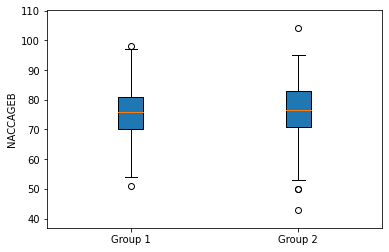

************************************************************************************************************************





Feature:  NACCAGE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=6.385373505427106, pvalue=0.011904067199223425)
Test: f_t, p_value_t -1.470E-01 8.832E-01
ANOVA: f, p_value: 2.410E-02 8.832E-01
--------------------------------------------------------------------------------


Group1:  [68 80 84 78 71 67 65 81 99 88 70 74 83 81 106 85 67 72 69 77 75 81 83 80
 77 80 81 86 82 84 66 85 75 80 67 82 95 81 76 87 78 77 73 78 85 87 79 98
 76 78 90 72 77 64 64 90 67 87 89 82 68 82 63 95 79 89 81 98 77 87 75 85
 78 94 92 82 66 83 65 78 62 74 87 87 71 68 94 77 85 86 81 86 85 95 96 80
 85 63 72 85 82 73 82 88 75 75 77 82 81 78 91 69 90 97 77 80 82 86 82 77
 87 69 67 95 79 77 87 81 89 70 78 90 93 77 75 84 86 79 77 75 83 82 66 71
 70 82 88 93 78 79 67 65 76 60 91 95 78 84 70 87 94 81 86 69 70 89 66 78
 85 80 6

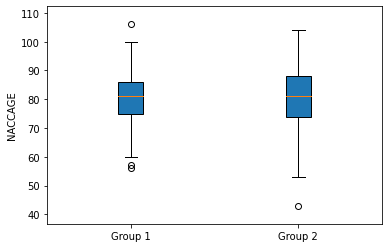

************************************************************************************************************************





Feature:  NACCIDEM


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=5.3018986224608335, pvalue=0.021832085406211243)
Test: f_t, p_value_t 2.265E+00 2.427E-02
ANOVA: f, p_value: 5.302E+00 2.427E-02
--------------------------------------------------------------------------------


Group1:  [8 1 8 8 1 8 8 1 8 8 8 8 8 8 1 8 8 1 8 1 8 8 8 1 8 8 8 8 8 8 8 8 8 8 8 8 1
 8 8 1 8 1 8 8 8 8 8 1 8 8 1 8 8 8 8 1 8 1 8 1 8 8 8 8 8 1 1 8 8 8 8 8 8 1
 1 8 1 8 8 8 8 8 8 8 8 8 1 8 8 8 8 8 1 1 1 8 8 8 1 1 8 8 1 8 8 8 8 1 8 1 1
 8 1 8 8 1 1 1 1 8 8 8 8 1 1 8 1 8 1 8 8 1 8 8 8 8 1 8 8 1 8 1 8 8 8 1 8 1
 1 8 8 8 8 8 1 1 8 8 1 1 1 8 1 8 8 8 1 8 1 8 8 8 1 8 8 8 1 8 1 8 8 1 8 8 1
 8 8 8 8 8 8 8 8 8 8 1 8 8 1 1 8 1 8 8 8 8 8 1 1 8 1 8 8 8 1 1 1 8 8 8 1 8
 8 1 8 8 1 8 8 8 1 8 1 8 8 8 1 1 1 8 1 8 1 8 8]


Group2:  [8 8 1 1 1

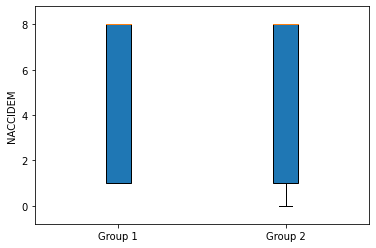

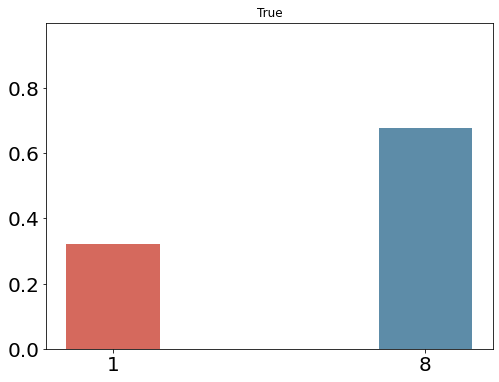

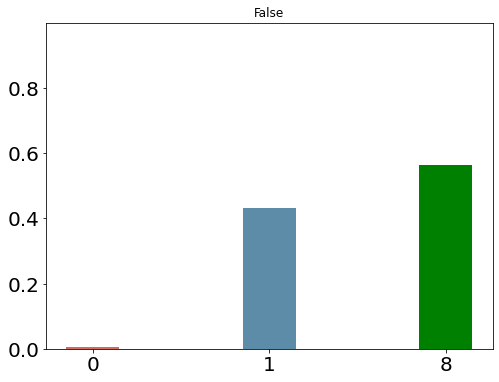

************************************************************************************************************************





Feature:  NACCMCII


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=4.571293683073255, pvalue=0.03313782947442085)
Test: f_t, p_value_t -1.960E+00 5.120E-02
ANOVA: f, p_value: 4.571E+00 5.120E-02
--------------------------------------------------------------------------------


Group1:  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 8 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 8 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1
 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 8 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 8 0 8 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 8 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0]


Group2:  [0 0 1 1 0 

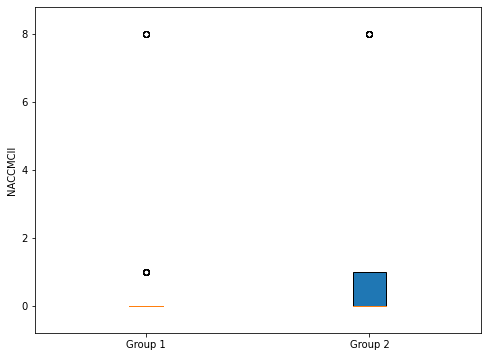

************************************************************************************************************************





Feature:  COMMUN


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=24.973847059140724, pvalue=8.819415293629283e-07)
Test: f_t, p_value_t 1.465E+01 2.192E-35
ANOVA: f, p_value: 2.426E+02 2.192E-35
--------------------------------------------------------------------------------


Group1:  [2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 2.0 1.0 2.0 2.0 2.0
 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 2.0 3.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 2.0 3.0 2.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0 3.0 2.0
 2.0 3.0 1.0 2.0 3.0 2.0 2.0 3.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 2.0 2.0 3.0 2.0 2.0 2.0 1.0 1.0 2.0 3.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 2.0 

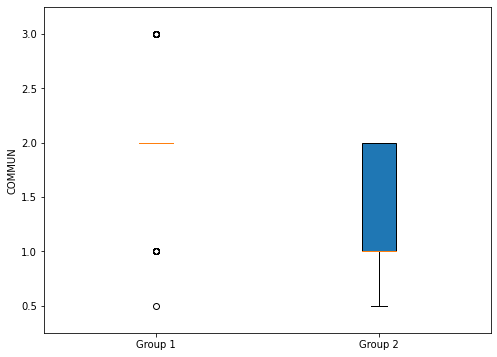

************************************************************************************************************************





Feature:  DECIN


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.34590952787887436, pvalue=0.5567808857149925)
Test: f_t, p_value_t -1.114E-01 9.114E-01
ANOVA: f, p_value: 1.240E-02 9.114E-01
--------------------------------------------------------------------------------


Group1:  [1 1 1 1 1 1 1 1 1 1 1 1 9 1 1 1 1 1 0 1 1 1 9 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 9 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 9 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 8 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 9 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 9
 1 1 1 1 1 1 9 1 1 1 1 1 1 1 1 1 1 1 9 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 9 1 1 1 1 1 1 1 1 1]


Group2:  [1 1 1 1 1 1 

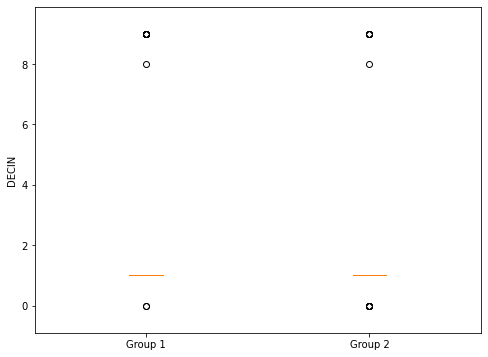

************************************************************************************************************************





Feature:  HOMEHOBB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=16.194512355987957, pvalue=6.876887265011884e-05)
Test: f_t, p_value_t 1.079E+01 1.536E-22
ANOVA: f, p_value: 1.306E+02 1.536E-22
--------------------------------------------------------------------------------


Group1:  [2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 3.0 3.0 2.0 2.0 2.0
 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 2.0 2.0 2.0 2.0 2.0 1.0
 3.0 2.0 2.0 2.0 2.0 2.0 2.0 3.0 2.0 1.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 1.0
 2.0 2.0 3.0 2.0 3.0 3.0 2.0 2.0 2.0 2.0 2.0 1.0 2.0 2.0 2.0 2.0 2.0 2.0
 2.0 2.0 3.0 2.0 2.0 2.0 3.0 2.0 2.0 3.0 2.0 3.0 2.0 2.0 2.0 2.0 3.0 2.0
 2.0 3.0 2.0 2.0 3.0 2.0 2.0 3.0 2.0 3.0 2.0 2.0 2.0 3.0 3.0 2.0 2.0 2.0
 2.0 2.0 2.0 3.0 3.0 2.0 2.0 2.0 2.0 3.0 3.0 2.0 2.0 2.0 2.0 3.0 2.0 3.0
 2.0 1.

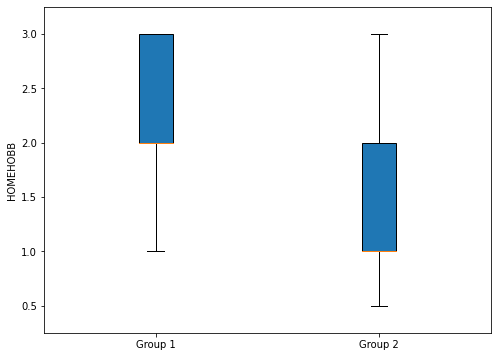

************************************************************************************************************************





Feature:  NACCNE4S


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=11.200912174653807, pvalue=0.0008976252682508808)
Test: f_t, p_value_t -1.981E+00 4.888E-02
ANOVA: f, p_value: 4.802E+00 4.888E-02
--------------------------------------------------------------------------------


Group1:  [2 1 0 2 1 0 2 1 0 0 1 1 1 1 1 2 1 1 0 1 0 1 1 1 2 1 1 1 0 1 2 0 1 1 1 0 0
 1 1 0 1 1 1 0 1 0 2 0 0 0 1 0 2 0 0 0 0 1 0 1 2 9 1 0 1 0 2 0 1 0 1 1 0 1
 9 1 0 0 2 2 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 9 0 2 1 0 2 1 0 1 1 1 0 1 0 1 0
 1 0 0 1 1 2 1 2 0 1 1 9 9 1 0 1 1 1 1 0 1 0 1 1 0 0 1 9 1 0 0 0 1 1 0 1 0
 9 1 1 2 0 2 1 1 1 1 1 1 0 1 1 2 0 0 0 0 1 1 9 1 1 0 2 0 1 1 2 0 0 2 1 1 0
 2 1 1 0 0 1 1 0 2 0 2 1 2 9 1 1 0 2 0 2 0 9 2 0 2 1 0 1 1 0 0 1 0 9 9 0 1
 0 1 1 9 0 0 2 0 2 1 0 2 0 1 1 1 0 1 0 0 1 9 2]


Group2:  [9 1 0 0

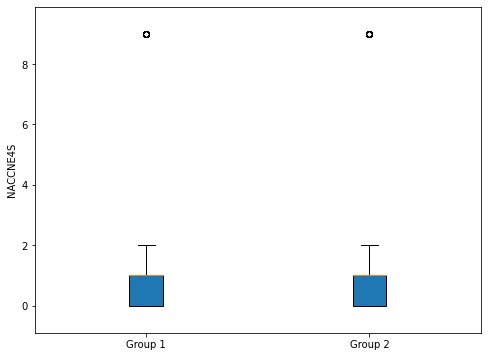

************************************************************************************************************************





Feature:  DECSUB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=9.748960866327424, pvalue=0.0019291192121437047)
Test: f_t, p_value_t 2.445E+00 1.496E-02
ANOVA: f, p_value: 4.968E+00 1.496E-02
--------------------------------------------------------------------------------


Group1:  [0 1 0 1 0 8 1 1 0 1 1 1 9 1 8 0 1 0 0 1 1 1 9 1 0 0 0 0 1 1 1 0 1 1 0 1 1
 0 1 1 1 8 0 8 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 8 8 8 8 1 1 1 0 1 1 0 9 1 1
 8 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 8 1 0 0 0 1 0 1 1 0 0 1 8 9 1 0 0 0 1 1
 1 1 1 1 1 0 8 1 0 8 1 1 1 8 1 0 0 1 8 1 1 1 1 0 0 1 0 1 8 0 0 1 1 0 1 0 1
 8 0 1 0 1 1 1 0 1 0 8 0 8 0 1 0 9 8 8 8 1 8 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1
 0 1 1 8 1 1 9 1 0 1 1 1 0 1 8 1 8 1 9 1 1 8 1 0 1 0 0 1 0 0 8 1 0 0 8 1 1
 1 1 1 1 0 0 0 0 8 0 1 0 1 9 0 8 1 1 1 1 1 0 0]


Group2:  [1 0 1 1 1 0

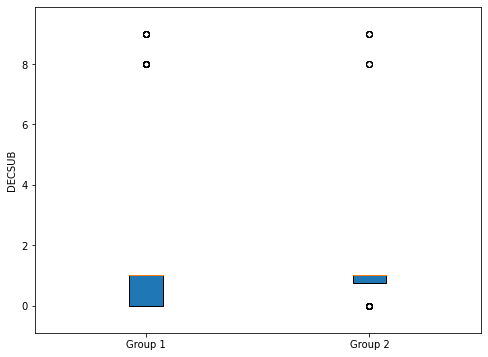

************************************************************************************************************************





Feature:  NPTDPD


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=2.6202266185667726, pvalue=0.1063240130754135)
Test: f_t, p_value_t -1.256E+00 2.097E-01
ANOVA: f, p_value: 1.578E+00 2.097E-01
--------------------------------------------------------------------------------


Group1:  [1 0 1 1 8 1 1 1 1 1 1 0 1 0 0 8 1 1 1 8 8 1 1 1 1 1 1 0 8 8 0 1 1 1 0 1 1
 1 1 0 1 1 0 1 1 1 0 8 1 1 1 1 1 8 0 8 1 1 1 8 1 1 1 1 1 8 1 1 0 1 1 8 0 1
 1 1 1 1 0 1 1 8 1 0 8 1 8 0 1 1 1 0 0 8 0 8 1 1 0 8 1 1 1 1 1 1 1 0 1 0 1
 1 8 1 0 1 1 8 1 8 1 1 1 1 0 1 0 1 1 1 0 1 1 1 8 1 8 1 1 8 8 1 0 8 0 1 0 1
 1 1 1 0 0 0 1 8 1 1 8 8 1 8 8 1 0 1 0 1 1 1 1 1 8 1 1 1 8 0 1 1 8 0 1 1 8
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 8 8 0 0 1 0 1 8 1 1 1 8 0 1 1
 1 1 1 1 1 1 1 0 8 0 1 1 0 1 1 1 1 1 1 1 1 1 1]


Group2:  [1 0 1 0 8 1 

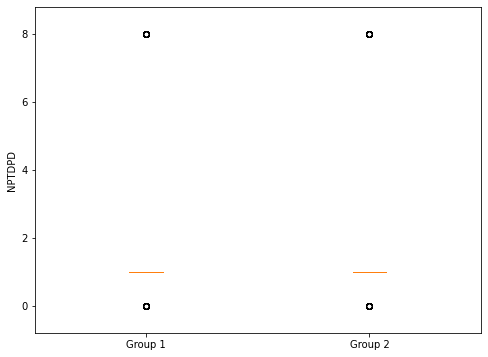

************************************************************************************************************************







In [5]:
group1_index=np.where(data_arr[:,-1]==True)[0]
group2_index=np.where(data_arr[:,-1]==False)[0]

for i in np.arange(used_number_features):
    feature_name=FS_data_used[i]
    
    print("Feature: ",feature_name)
    
    
    index_i=np.where(column_names_arr==feature_name)[0][0]
    get_data_i=data_arr[:,index_i]
    
    group1_data=get_data_i[group1_index]
    group2_data=get_data_i[group2_index]
    
    statistic_analysis(group1_data, group2_data)
    
    print("Group1: ",group1_data)
    print("\n")
    print("Group2: ",group2_data)
    print("\n")
    print("Mean: ",np.mean(group1_data),np.mean(group2_data))
    
    bar_figure(group1_data,group2_data,feature_name)
    
    if feature_name=='NACCIDEM':
        draw_bar(group1_data,'True')
        draw_bar(group2_data,'False')
            
    
    print("*"*120)
    print("\n\n\n")
    
    
    print()